In [95]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



In [96]:
dataset1 = pd.read_csv('data_2d.csv')
dataset2 = pd.read_csv('mnist.csv')

def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

def plot_elbow_method(distortions):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, len(distortions) + 1), distortions, marker='o', linestyle='--')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Змінна внутрішня сума квадратів')
    plt.title('Метод ліктя')
    plt.show()

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='Set1', alpha=0.8)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Додавання легенди вручну
    legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.gca().add_artist(legend1)

    plt.show()

def plot_clusters_3d(data, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='Set1', s=50)
    
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    # Додавання легенди вручну
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    plt.show()

In [97]:
dataset1.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [98]:
dataset2.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


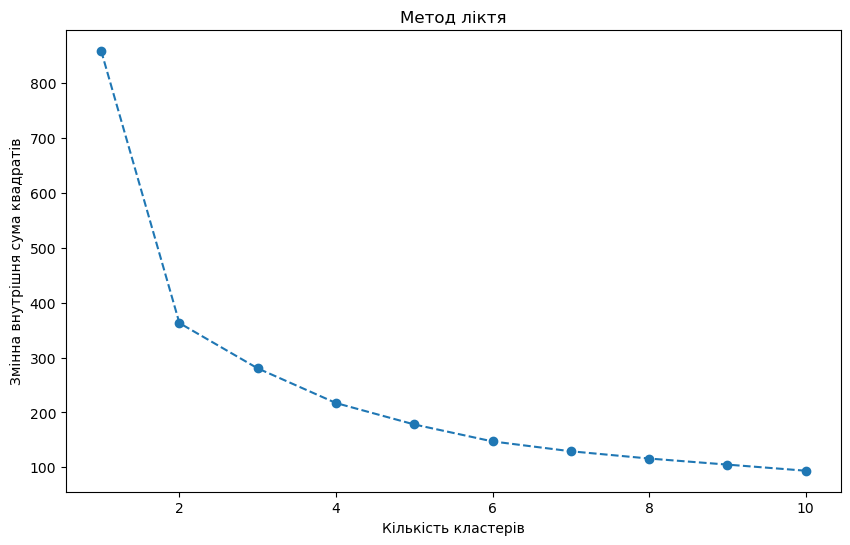

In [99]:
# кластеризація та оптимальна кількість кластерів для dataset1
distortions_dataset1 = find_optimal_clusters(dataset1, 10)
plot_elbow_method(distortions_dataset1)


    Відповідно до графіка, для dataset1 оптимальне число кластерів - 2

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


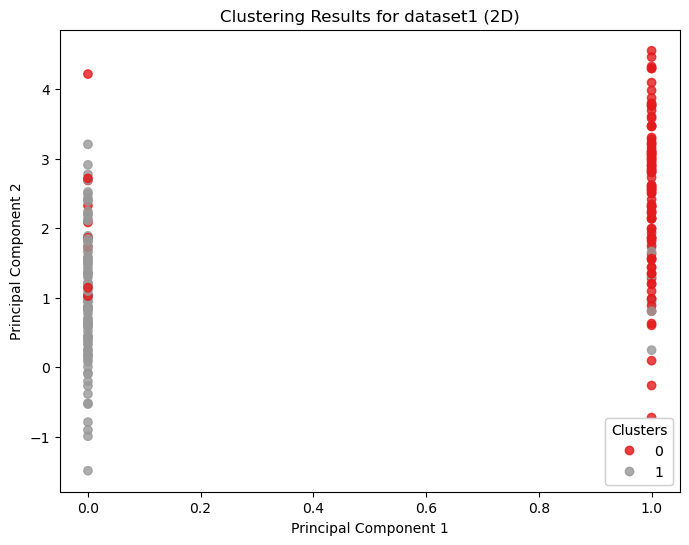

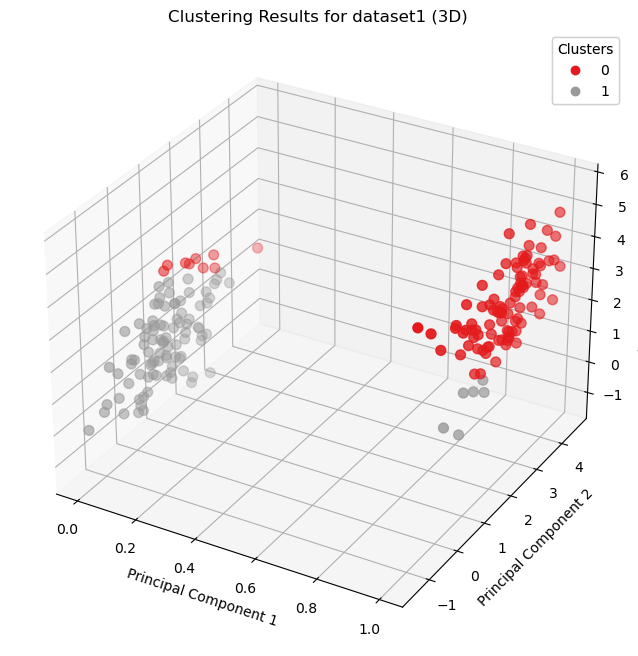

In [100]:
# кластеризація для датасету 1
kmeans_dataset1 = KMeans(n_clusters=2, random_state=42)
kmeans_dataset1.fit(dataset1.values)
labels_dataset1 = kmeans_dataset1.labels_

# Візуалізація результатів кластеризації для датасету 1 у двох вимірах
plot_clusters(dataset1.values, labels_dataset1, 'Clustering Results for dataset1 (2D)')

# Візуалізуємо результати кластеризації для датасету 1 у тривимірному просторі
plot_clusters_3d(dataset1.values, labels_dataset1, 'Clustering Results for dataset1 (3D)')


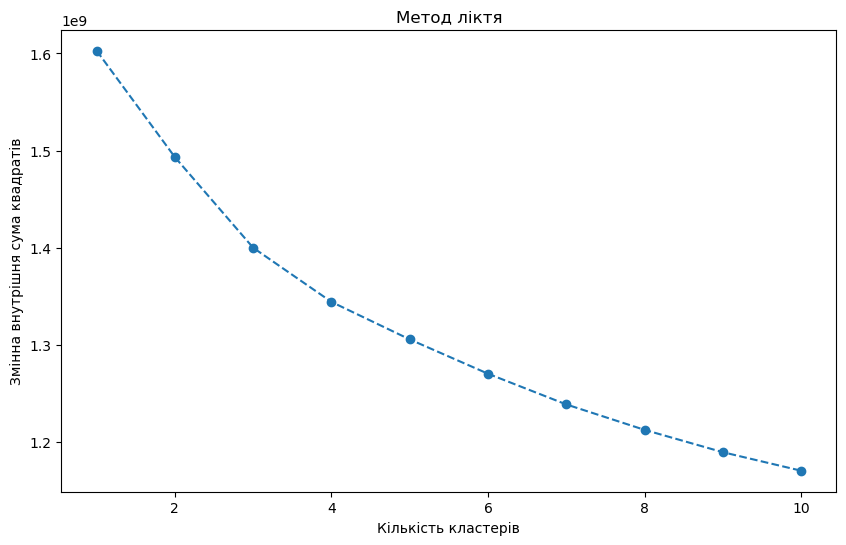

In [101]:

#  кластеризація та оптимальна кількість кластерів для mnist
distortions_mnist_pca = find_optimal_clusters(dataset2, 10)
plot_elbow_method(distortions_mnist_pca)

    приблизно встановлена "точка ліктя" - 3
    Далі спробуємо обробити дані mnist і перевірити встановлену точку ліктя
    Побудуємо графіки ліктя для кожної розмірності даних PCA

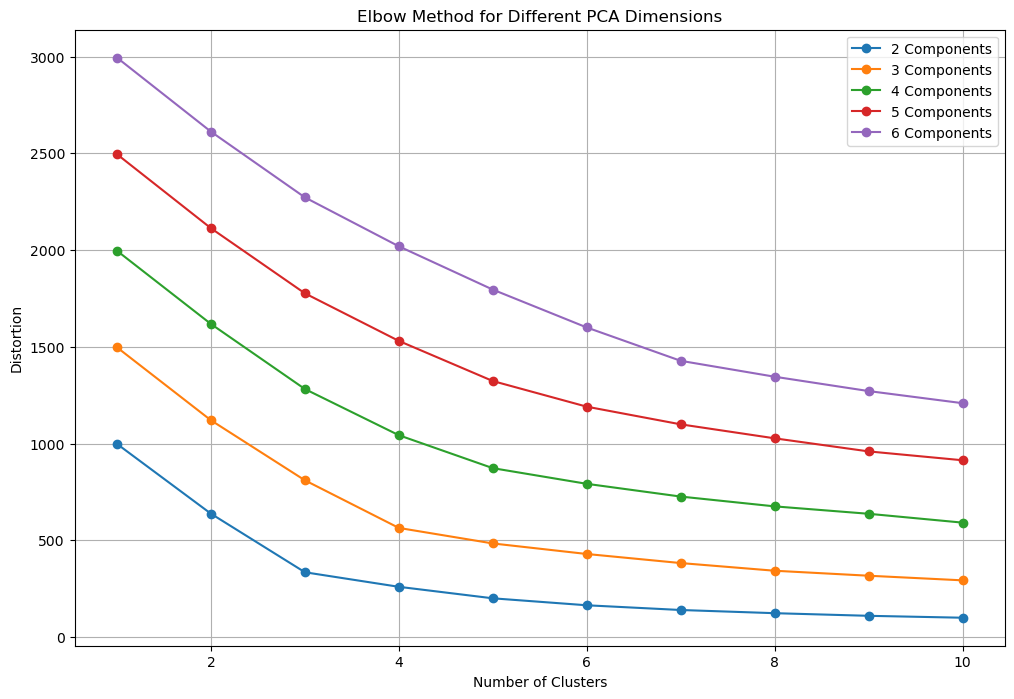

In [102]:
# список для зберігання змінних внутрішньої суми квадратів для кожної розмірності даних PCA
distortions_list = []

# кількість головних компонент для аналізу
n_components_list = [2, 3, 4, 5, 6]

for n_components in n_components_list:
    # Застосовуємо PCA до даних для поточної кількості головних компонент
    pca = PCA(n_components=n_components)
    mnist_pca = pca.fit_transform(dataset2)

    # стандартизація даних після PCA
    scaler = StandardScaler()
    mnist_scaled_pca = scaler.fit_transform(mnist_pca)

    # змінна внутрішньої суми квадратів для поточної розмірності даних PCA
    distortions_mnist_pca = find_optimal_clusters(mnist_scaled_pca, 10)
    distortions_list.append(distortions_mnist_pca)

# Побудова графіків ліктя
plt.figure(figsize=(12, 8))

for i, n_components in enumerate(n_components_list):
    plt.plot(range(1, len(distortions_list[i]) + 1), distortions_list[i], marker='o', label=f'{n_components} Components')

plt.title('Elbow Method for Different PCA Dimensions')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.legend()
plt.grid(True)
plt.show()


    На основі отриманих графіків, для датасету mnist кількість кластерів = 3, що добре видно з графіка для скороченого до 2 числа компонент, а також 4 - для числа компонент  3.
    Надалі приймемо число кластерів - 3 і 4.

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


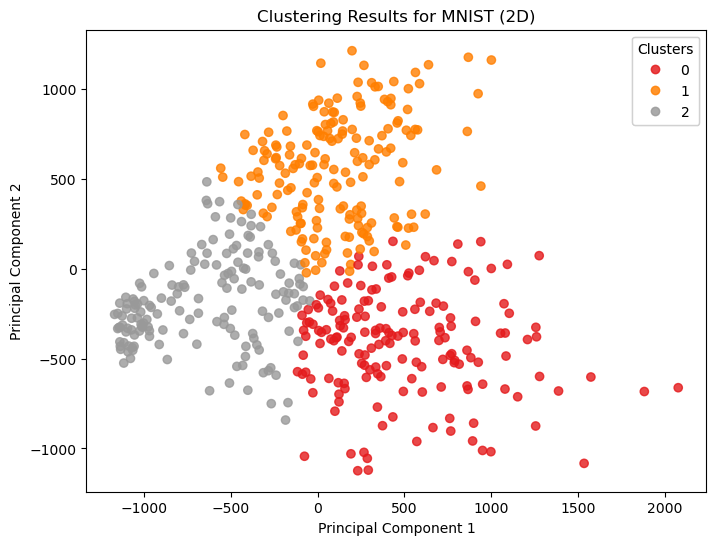

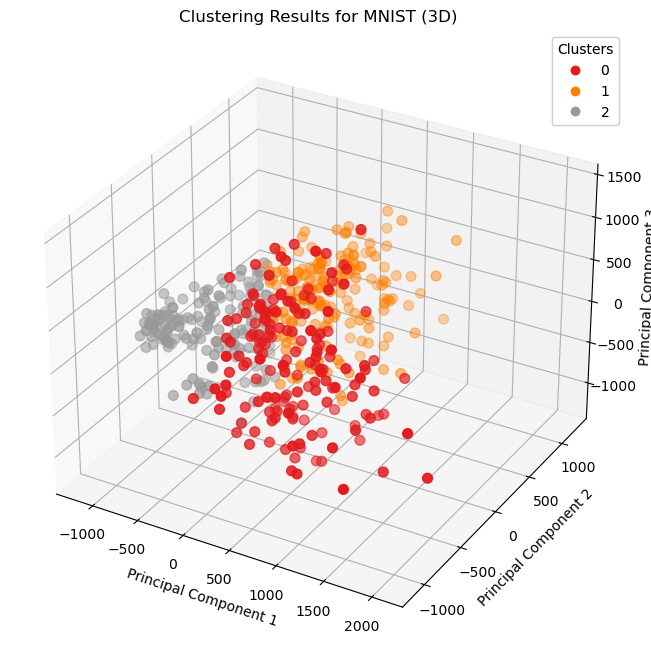

In [103]:
# Для числа кластерів 3
pca_mnist = PCA(n_components=3)
mnist_pca = pca_mnist.fit_transform(dataset2)

# Виконуємо кластеризацію для зменшених даних
kmeans_mnist_pca = KMeans(n_clusters=3, random_state=42)
kmeans_mnist_pca.fit(mnist_pca)
labels_mnist_pca = kmeans_mnist_pca.labels_

# Візуалізуємо результати кластеризації для датасету 2 у двох вимірах
plot_clusters(mnist_pca, labels_mnist_pca, 'Clustering Results for MNIST (2D)')

# Візуалізуємо результати кластеризації для датасету 2 у тривимірному просторі
plot_clusters_3d(mnist_pca, labels_mnist_pca, 'Clustering Results for MNIST (3D)')

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


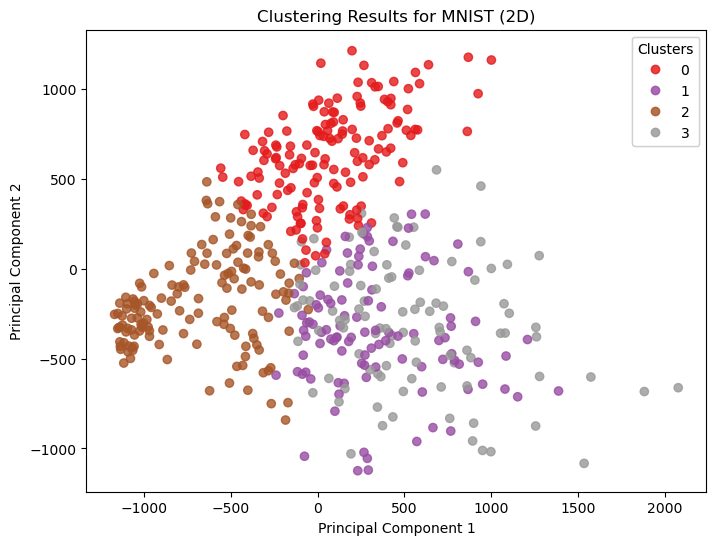

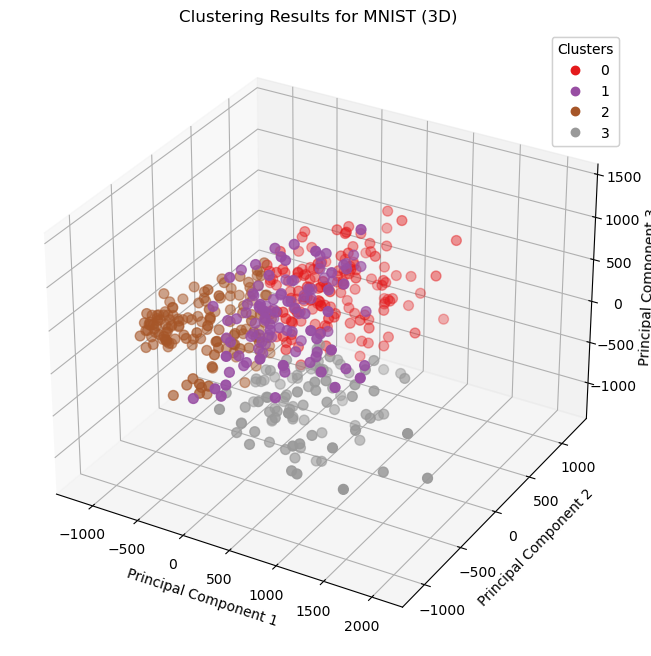

In [104]:
# Для числа кластерів 4
pca_mnist = PCA(n_components=3)
mnist_pca = pca_mnist.fit_transform(dataset2)

# Виконуємо кластеризацію для зменшених даних
kmeans_mnist_pca = KMeans(n_clusters=4, random_state=42)
kmeans_mnist_pca.fit(mnist_pca)
labels_mnist_pca = kmeans_mnist_pca.labels_

# Візуалізуємо результати кластеризації для датасету 2 у двох вимірах
plot_clusters(mnist_pca, labels_mnist_pca, 'Clustering Results for MNIST (2D)')

# Візуалізуємо результати кластеризації для датасету 2 у тривимірному просторі
plot_clusters_3d(mnist_pca, labels_mnist_pca, 'Clustering Results for MNIST (3D)')

        Виконано кластеризацію для датасету 1 і датасету 2 (mnist).
    За допомогобю методу ліктя встановлено оптимальне число кластерів для датасету 1, - 2 кластери.
    Для датасету датасету 2 (mnist) - число кластерів становить 3 або 4, в залежності від ступеня скорочення числа компонент.

    Побудовано графіки розсіяння для кожного з датасетів. Для датасету 2 (mnist) побудовано графіки для 3 і 4 кластерів відповідно.